In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  


np.random.seed(42)  

date_range = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')  

temperature = 20 + 10 * np.sin(np.linspace(0, 3 * np.pi, len(date_range))) + np.random.normal(0, 2, len(date_range))  

df = pd.DataFrame(data={'date': date_range, 'temperature': temperature})  
df.set_index('date', inplace=True)  

missing_indices = np.random.choice(df.index, size=50, replace=False)  
df.loc[missing_indices] = np.nan  

print(df.head(10))

            temperature
date                   
2020-01-01    20.993428
2020-01-02          NaN
2020-01-03    21.811574
2020-01-04    23.819925
2020-01-05    20.562710
2020-01-06    20.819208
2020-01-07    24.701514
2020-01-08    23.332535
2020-01-09    21.112096
2020-01-10    23.388177


In [3]:
  
df.fillna(method='ffill', inplace=True)  

df = df[~df.index.duplicated(keep='first')]  
 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB
None


In [4]:

df_monthly = df.resample('M').mean()  

print(df_monthly)

            temperature
date                   
2020-01-31    23.355698
2020-02-29    28.429507
2020-03-31    28.881296
2020-04-30    23.970164
2020-05-31    16.549582
2020-06-30    11.333629
2020-07-31    11.144866
2020-08-31    16.106053
2020-09-30    23.233649
2020-10-31    29.259190
2020-11-30    29.404769
2020-12-31    23.447927


C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


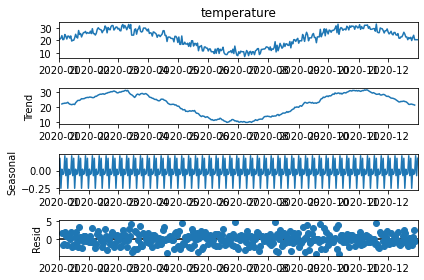

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose  

result = seasonal_decompose(df['temperature'], model='additive')  
result.plot()  
plt.show()  
 
detrended = df['temperature'] - result.trend

In [6]:
from sklearn.preprocessing import MinMaxScaler  

scaler = MinMaxScaler()  
df['scaled_temperature'] = scaler.fit_transform(df[['temperature']])  

print(df[['temperature', 'scaled_temperature']].head(10))

            temperature  scaled_temperature
date                                       
2020-01-01    20.993428            0.535705
2020-01-02    20.993428            0.535705
2020-01-03    21.811574            0.567276
2020-01-04    23.819925            0.644775
2020-01-05    20.562710            0.519085
2020-01-06    20.819208            0.528983
2020-01-07    24.701514            0.678794
2020-01-08    23.332535            0.625967
2020-01-09    21.112096            0.540285
2020-01-10    23.388177            0.628115


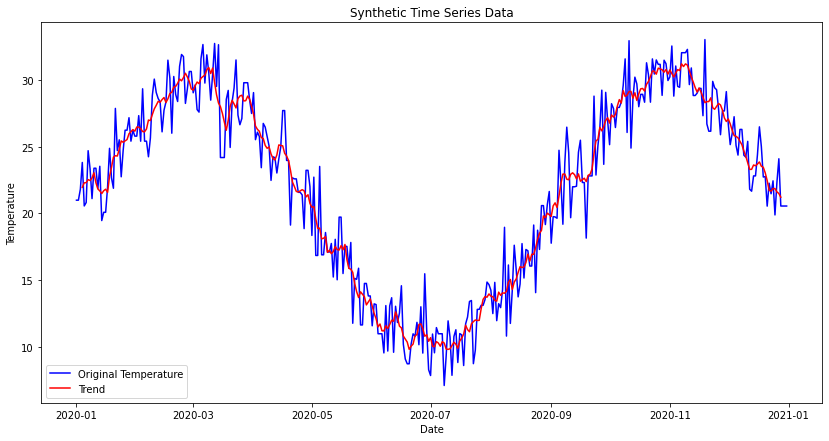

In [7]:
plt.figure(figsize=(14, 7))  
plt.plot(df.index, df['temperature'], label='Original Temperature', color='blue')  
plt.plot(df.index, result.trend, label='Trend', color='red')  
plt.title('Synthetic Time Series Data')  
plt.xlabel('Date')  
plt.ylabel('Temperature')  
plt.legend()  
plt.show()